### KMeans para agrupar datos

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
def clean_df(df):
    '''
    Reglas de descarte
        - drop if culture_cl=="Chanca"
        -  drop if culture_cl=="Lima"
        -  drop if culture_cl=="Cajamarca" & period_n==5
        -  drop if culture_cl=="Cajamarca" & period_n==7
        -  drop if culture_cl=="Pukara" & period_n==6
        -  drop if culture_cl=="Salinar" & period_n==6
        -  drop if culture_cl=="Sican" & period_n==8
        - drop if culture_cl=="Vicus" & period_n==6
        - drop if region is null
        - drop if culture_cl is null
        - drop if period_n==5
    '''
    df = df[df.culture_cl != 'Chanca']
    df = df[df.culture_cl != 'Lima']
    df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 5))]
    df = df[~((df.culture_cl == 'Cajamarca') & (df.cronology_time == 7))]
    df = df[~((df.culture_cl == 'Pukara') & (df.cronology_time == 6))]
    df = df[~((df.culture_cl == 'Salinar') & (df.cronology_time == 6))]
    df = df[~((df.culture_cl == 'Sican') & (df.cronology_time == 8))]
    df = df[~((df.culture_cl == 'Vicus') & (df.cronology_time == 6))]
    df = df[~df.region.isnull()]
    df = df[~df.culture_cl.isnull()]
    df = df[df.cronology_time != 5]

    df = df.reset_index(drop=True)
    
    return df

### Importamos el dataset consolidado

In [3]:
dataset_df = pd.read_excel('../../data/dataset_v4.xlsx')
dataset_df.head()

,Unnamed: 0,catalogation_id,cronology,cronology_time,culture_cl,morfofunctional_category,description,principal_scene,decoration_tecnique_external_body_section1,color_external_body_section1,...,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105,file_path,image_path
0,0,ML020107,Horizonte Medio,7,Sican,botella doble cuerpo asa puente cintada silbadora,botella doble cuerpo asa puente cintada silbad...,NaN,pintado escultorico,crema y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020107a.jpg
1,1,ML020108,Horizonte Medio,7,Sican,botella doble pico asa puente cintada escultorica,botella doble pico asa puente cintada escultor...,NaN,pintado escultorico,rojo y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020108a.jpg
2,2,ML020109,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020109a.jpg
3,3,ML020110,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y naranja,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020110a.jpg
4,4,ML020111,Horizonte Medio,7,Sican,botella gollete asa puente cintada protoma sil...,botella gollete asa puente cintada protoma sil...,NaN,pintado escultorico,crema y marron,...,0,0,1,1,1,0,1,0,data/sican_7/7 ADMINISTRADOR COLECCIONES VIRTU...,data/images/ML020111a.jpg


### Importamos los embeddings

In [4]:
dataset_filename = 'bert_embeddings.csv'
embedding_column = 'embedding'
sep_char = ';'

In [5]:
df = pd.read_csv(f'../../data/{dataset_filename}', sep=sep_char)
df

,Unnamed: 0,catalogation_id,culture_cl,description,embedding
0,0,ML020107,Sican,botella doble cuerpo asa puente cintada silbad...,"[0.17316726, -0.6274872, 0.0407279, -0.0887306..."
1,1,ML020108,Sican,botella doble pico asa puente cintada escultor...,"[0.17790586, -0.68238825, -0.40351287, -0.2387..."
2,2,ML020109,Sican,botella gollete asa puente cintada protoma sil...,"[0.07478304, -0.5415242, -0.34691423, 0.007677..."
3,3,ML020110,Sican,botella gollete asa puente cintada protoma sil...,"[-0.06786743, -0.45162752, -0.20201102, -0.069..."
4,4,ML020111,Sican,botella gollete asa puente cintada protoma sil...,"[0.095533825, -0.518077, -0.30639765, -0.22455..."
...,...,...,...,...,...
33576,33577,ML038832,Tiahuanaco,plato con diseños geometricos de lineas horizo...,"[-0.21575417, -0.6014442, -0.5351323, 0.295663..."
33577,33578,ML038833,Tiahuanaco,plato con diseños geometricos de eses ( s) y l...,"[-0.59130156, -1.0794916, -0.2997423, -0.03917..."
33578,33579,ML015075,Cajamarca,cuenco escultorico que representa a un felino ...,"[0.10485042, -0.74276745, -0.27508265, -0.3266..."
33579,33580,ML015241,Cajamarca,cuenco con representacion de cabeza estilizada...,"[0.7909232, -0.19150409, -0.6404954, -0.548680..."


Agregamos la columna de cronología en caso no exista

In [6]:
if 'cronology_time' not in df.columns.tolist():
    df['cronology_time'] = dataset_df['cronology_time']
if 'region' not in df.columns.tolist():
    df['region'] = dataset_df['region']

Agregamos las columnas de traits al dataset

In [7]:
trait_columns = [col for col in dataset_df.columns.tolist() if 'trait_' in col]
for t in trait_columns:
    df[t] = dataset_df[t]
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
display(df.head())
len(df)

/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_10193/3093009158.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t] = dataset_df[t]
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_10193/3093009158.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t] = dataset_df[t]
/var/folders/5x/tlp5fd614dv9y_wn8nmtqv4rqq_frn/T/ipykernel_10193/3093009158.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

,catalogation_id,culture_cl,description,embedding,cronology_time,region,trait_color_amarillo,trait_color_beige,trait_color_blanco,trait_color_crema,...,trait_n87,trait_n88,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105
0,ML020107,Sican,botella doble cuerpo asa puente cintada silbad...,"[0.17316726, -0.6274872, 0.0407279, -0.0887306...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
1,ML020108,Sican,botella doble pico asa puente cintada escultor...,"[0.17790586, -0.68238825, -0.40351287, -0.2387...",7,Costa Norte,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,ML020109,Sican,botella gollete asa puente cintada protoma sil...,"[0.07478304, -0.5415242, -0.34691423, 0.007677...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
3,ML020110,Sican,botella gollete asa puente cintada protoma sil...,"[-0.06786743, -0.45162752, -0.20201102, -0.069...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
4,ML020111,Sican,botella gollete asa puente cintada protoma sil...,"[0.095533825, -0.518077, -0.30639765, -0.22455...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0


33581

### Limpiamos el dataset de embeddings

In [8]:
df = clean_df(df)
df

,catalogation_id,culture_cl,description,embedding,cronology_time,region,trait_color_amarillo,trait_color_beige,trait_color_blanco,trait_color_crema,...,trait_n87,trait_n88,trait_n89,trait_n90,trait_n100,trait_n101,trait_n102,trait_n103,trait_n104,trait_n105
0,ML020107,Sican,botella doble cuerpo asa puente cintada silbad...,"[0.17316726, -0.6274872, 0.0407279, -0.0887306...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
1,ML020108,Sican,botella doble pico asa puente cintada escultor...,"[0.17790586, -0.68238825, -0.40351287, -0.2387...",7,Costa Norte,0,0,0,0,...,0,0,0,0,1,1,1,0,1,0
2,ML020109,Sican,botella gollete asa puente cintada protoma sil...,"[0.07478304, -0.5415242, -0.34691423, 0.007677...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
3,ML020110,Sican,botella gollete asa puente cintada protoma sil...,"[-0.06786743, -0.45162752, -0.20201102, -0.069...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
4,ML020111,Sican,botella gollete asa puente cintada protoma sil...,"[0.095533825, -0.518077, -0.30639765, -0.22455...",7,Costa Norte,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31821,ML035466,Tiahuanaco,cuenco con diseños geometricos de lineas verti...,"[-0.15830764, -0.5200171, -0.5023318, -0.00599...",6,Costa Sur,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
31822,ML035498,Tiahuanaco,botella gollete asa lateral con diseños geomet...,"[-0.3365426, -0.81007195, -0.11956785, -0.1223...",6,Costa Sur,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0
31823,ML038832,Tiahuanaco,plato con diseños geometricos de lineas horizo...,"[-0.21575417, -0.6014442, -0.5351323, 0.295663...",6,Costa Sur,0,0,0,1,...,0,0,0,1,1,1,1,0,1,0
31824,ML038833,Tiahuanaco,plato con diseños geometricos de eses ( s) y l...,"[-0.59130156, -1.0794916, -0.2997423, -0.03917...",6,Costa Sur,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0


In [9]:
def str_to_list(string):
    string_list = string.strip('][').split(', ')
    float_list = [float(i) for i in string_list]
    return float_list

df[embedding_column] = df[embedding_column].apply(str_to_list)
df_spread = df[[embedding_column]].apply(lambda x: pd.Series(x[embedding_column]), axis=1).rename(columns=lambda i: f"c{i+1}")

Definimos funciones para graficar

In [34]:
def sample_df(original_df, n_samples):
    cultures = original_df.culture_cl.unique().tolist()
    sampled_dfs = list()

    for c in cultures:
        culture_df = original_df[original_df.culture_cl == c]
        if n_samples > len(culture_df):
            sampled_dfs.append(culture_df)
        else:
            sampled_df = culture_df.sample(n=n_samples, random_state=100)
            sampled_dfs.append(sampled_df)
    
    df = pd.concat(sampled_dfs, axis=0)
    return df


def plot_embeddings_2d(df, 
                       attribute, 
                       model_name, 
                       path_to_save = '', 
                       original_df=None,
                       get_samples=False, 
                       n_samples=100, 
                       preprocess_fn = None,
                       filter_by_trait: str=None):
    
    new_df = df.copy()
    
    if filter_by_trait is not None and original_df is not None:
        new_df[filter_by_trait] = original_df[filter_by_trait]
        new_df = new_df[new_df[filter_by_trait] > 0]

    if get_samples:
        new_df = sample_df(new_df, n_samples)

    if preprocess_fn:
        new_df['dim1'] = new_df['dim1'].apply(preprocess_fn)
        new_df['dim2'] = new_df['dim2'].apply(preprocess_fn)

    sns.set(rc={"figure.figsize":(12, 10)})

    ax = sns.scatterplot(new_df, x='dim1', y='dim2', hue=attribute)

    # configurar el gráfico    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(f"Dos dimensiones UMAP de distintas descripciones de imágenes según '{attribute}' | {model_name}")
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.show()

    if path_to_save:
        fig = ax.get_figure()
        fig.savefig(path_to_save) 

### Utilizamos umap para reducir dimensionalidad a 2

In [35]:
import umap

In [36]:
# Función para printear list
def pprint_list(lista):
    print('[')
    for elem in lista:
        print(f'\t{elem}')
    print(']')

def get_centroid(array1, array2):
    mean_dim1 = array1.mean()
    mean_dim2 = array2.mean()
    return (mean_dim1, mean_dim2)

def compute_centroid(df: pd.DataFrame, dim1: str, dim2: str, label: str, label_filter: str):
    filtered = df[df[label] == label_filter]
    _centroid = get_centroid(filtered[dim1], filtered[dim2])
    return {'label': label, 'filter_value': label_filter, 'centroid': _centroid}

def get_and_plot_centroids(df: pd.DataFrame, dim1: str, dim2: str, label: str):
    print('Computing centroids for each culture')
    centroids_array = list()
    label_values = df[label].unique().tolist()
    for val in label_values:
        _centroid = compute_centroid(
                        df=df, 
                        dim1=dim1, 
                        dim2=dim2, 
                        label=label, 
                        label_filter=val
                    )
        centroids_array.append(_centroid)
    return centroids_array

/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


len df_umap:  31826
plotting points


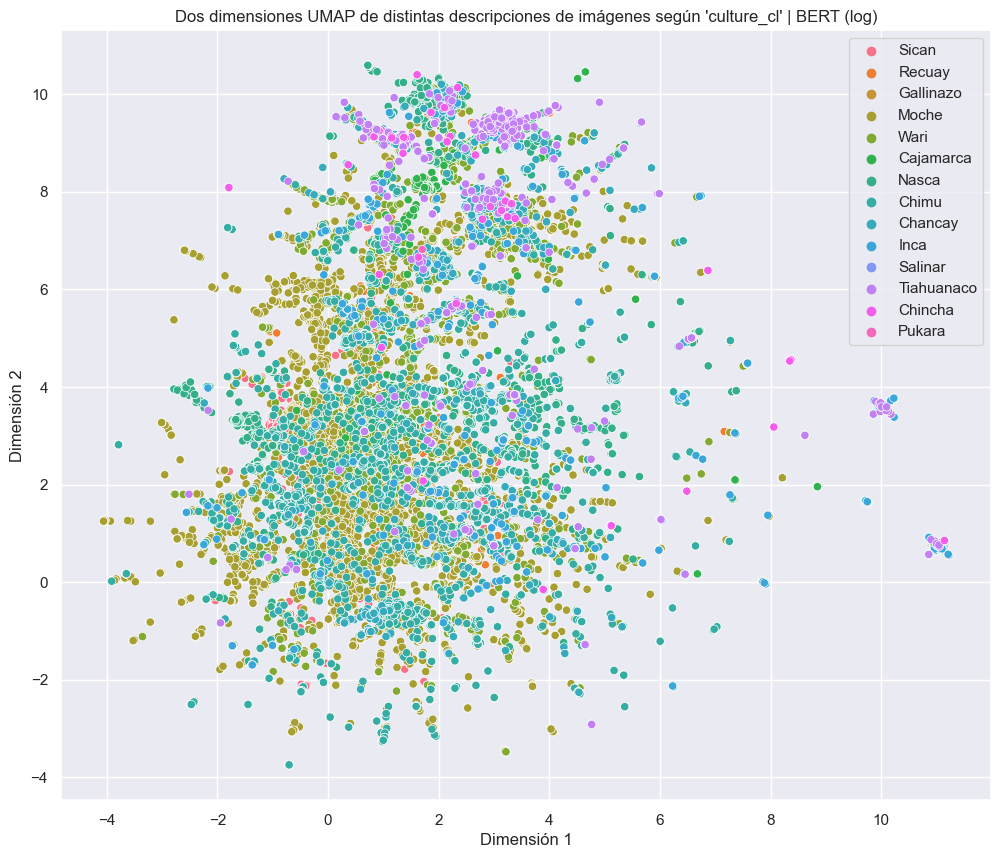

Computing centroids for each culture
[
	{'label': 'culture_cl', 'filter_value': 'Sican', 'centroid': (1.4893616, 2.8101838)}
	{'label': 'culture_cl', 'filter_value': 'Recuay', 'centroid': (2.0571046, 3.82658)}
	{'label': 'culture_cl', 'filter_value': 'Gallinazo', 'centroid': (1.6054939, 0.4108874)}
	{'label': 'culture_cl', 'filter_value': 'Moche', 'centroid': (1.5682504, 2.371841)}
	{'label': 'culture_cl', 'filter_value': 'Wari', 'centroid': (3.213782, 3.860988)}
	{'label': 'culture_cl', 'filter_value': 'Cajamarca', 'centroid': (4.8701277, 6.123203)}
	{'label': 'culture_cl', 'filter_value': 'Nasca', 'centroid': (2.3398848, 4.9512305)}
	{'label': 'culture_cl', 'filter_value': 'Chimu', 'centroid': (2.5247848, 2.3816674)}
	{'label': 'culture_cl', 'filter_value': 'Chancay', 'centroid': (4.2362576, 5.006251)}
	{'label': 'culture_cl', 'filter_value': 'Inca', 'centroid': (3.4403958, 4.8583055)}
	{'label': 'culture_cl', 'filter_value': 'Salinar', 'centroid': (6.0406013, 1.2663255)}
	{'label': 

In [60]:
# Read the source code: https://github.com/lmcinnes/umap/blob/master/umap/umap_.py
reducer = umap.UMAP(n_components=2, 
                    n_neighbors=30,
                    learning_rate=0.01,
                    init='pca',
                    random_state=41)

df_umap = reducer.fit_transform(X=df_spread.values)
df_umap = pd.DataFrame(df_umap, columns=['dim1', 'dim2'])
print('len df_umap: ', len(df_umap))
df_umap['catalogation_id'] = df['catalogation_id']
df_umap['culture_cl'] = df['culture_cl']
df_umap['cronology_time'] = df['cronology_time']
df_umap['region'] = df['region']

print('plotting points')
plot_embeddings_2d(df=df_umap,
                   attribute='culture_cl', 
                   model_name='BERT (log)',
)

pprint_list(
    get_and_plot_centroids(
        df=df_umap, 
        dim1='dim1', 
        dim2='dim2', 
        label='culture_cl', 
    )
)

---
## KMeans

Ahora procedemos a utilizar kmeans como técnica de aprendizaje no supervisado. El objetivo de esto es comparar los clusters obtenidos contra los cluster que ya tenemos etiquetados, a modo de revisar el grado de separación y de ajuste entre ambos casos.

In [61]:
# Calculamos el total de las culturas
total_cultures = len(df.culture_cl.unique().tolist())

# Definimos los parámetros a utilizar en el modelo
random_state = 41
n_clusters = total_cultures


In [62]:
kmeans_2d = KMeans(n_clusters=n_clusters,
                random_state=random_state, 
                n_init="auto").fit(df_umap[['dim1', 'dim2']])

kmeans_spread = KMeans(n_clusters=n_clusters,
                random_state=random_state, 
                n_init="auto").fit(df_spread)

In [63]:
df_umap['kmeans_2d_label'] = kmeans_2d.labels_
df_umap['kmeans_spread_label'] = kmeans_spread.labels_

In [64]:
df_umap

,dim1,dim2,catalogation_id,culture_cl,cronology_time,region,kmeans_2d_label,kmeans_spread_label
0,-0.654910,1.423575,ML020107,Sican,7,Costa Norte,12,7
1,0.249620,2.784702,ML020108,Sican,7,Costa Norte,9,7
2,2.186499,1.547630,ML020109,Sican,7,Costa Norte,6,3
3,2.151268,1.543986,ML020110,Sican,7,Costa Norte,6,3
4,2.111779,1.536578,ML020111,Sican,7,Costa Norte,6,7
...,...,...,...,...,...,...,...,...
31821,0.881819,9.274298,ML035466,Tiahuanaco,6,Costa Sur,7,2
31822,0.554032,7.320778,ML035498,Tiahuanaco,6,Costa Sur,1,1
31823,4.136024,8.956584,ML038832,Tiahuanaco,6,Costa Sur,4,2
31824,1.625731,8.830367,ML038833,Tiahuanaco,6,Costa Sur,7,8


### Graficamos los clusters obtenidos por Kmeans

Realizamos esto para el dataset ya reducido a 2 dimensiones

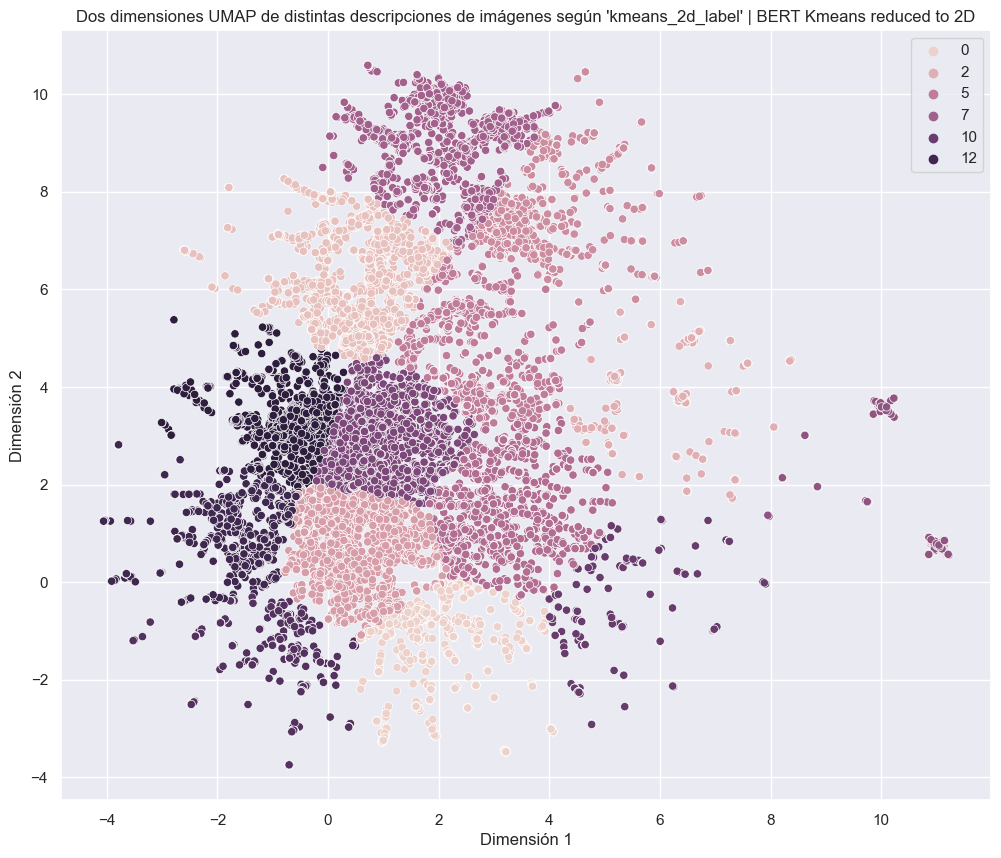

In [65]:
plot_embeddings_2d(df=df_umap,
                   attribute='kmeans_2d_label', 
                   model_name='BERT Kmeans reduced to 2D',
                   #path_to_save='../../data/images/bert_embeddings/bert_clusters_kmeans_2d_umap.png',
)

Ahora graficamos los clusters con respecto a todas las componentes del embedding

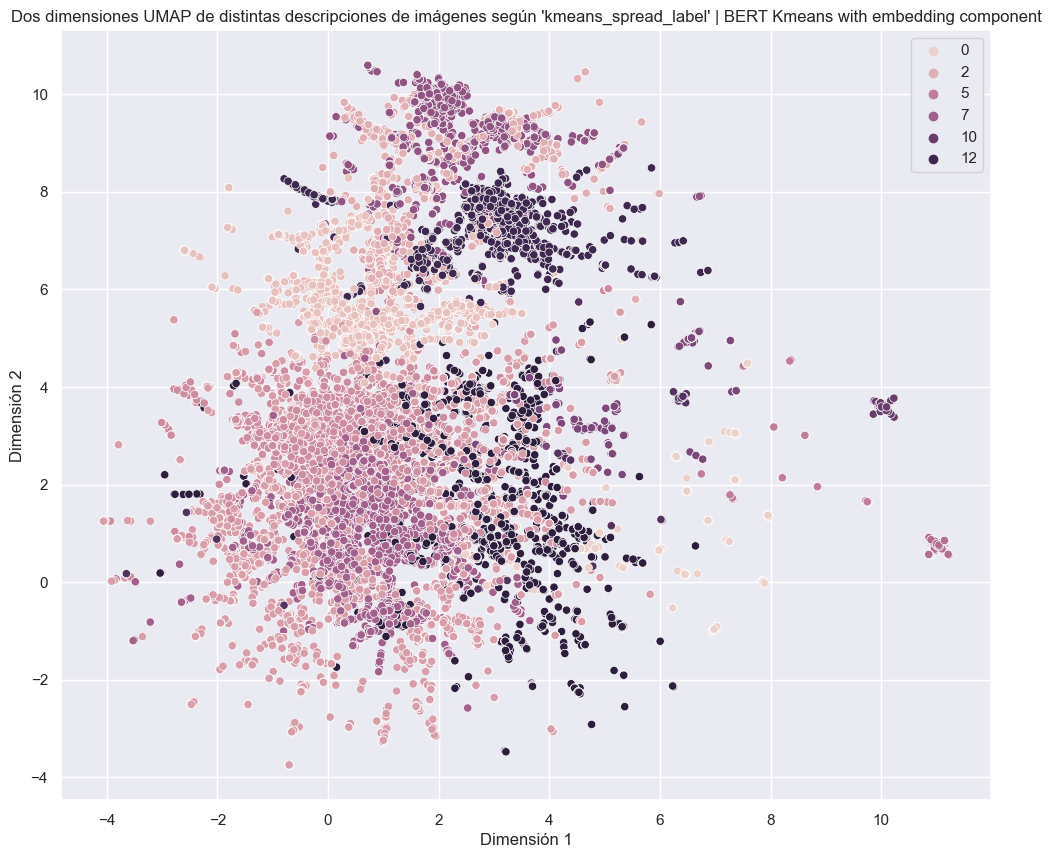

In [66]:
plot_embeddings_2d(df=df_umap,
                   attribute='kmeans_spread_label', 
                   model_name='BERT Kmeans with embedding component',
                   #path_to_save='../../data/images/bert_embeddings/bert_clusters_kmeans_2d_umap.png',
)

## Calculamos la calidad de la agrupación utilizando Adjusted Rand Score


---
Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Métrica que calcula la cantidad de datos que están asignados en un mismo cluster o clusters diferentes, para cada label

In [67]:
from sklearn.metrics import adjusted_rand_score

In [68]:
true_label = df_umap['culture_cl']
kmeans_2d_label = df_umap['kmeans_2d_label']
kmeans_spread_label = df_umap['kmeans_spread_label']

In [69]:
rand_score_2d = adjusted_rand_score(true_label, kmeans_2d_label)
rand_score_2d

0.0382132821514517

In [70]:
rand_score_spread = adjusted_rand_score(true_label, kmeans_spread_label)
rand_score_spread

0.07078218723388323